# In this project we are going to predict salary of person with given information.

In [4]:
# So lets import all important liabraries first 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("Salaries.csv")
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [6]:
df.shape

(397, 6)

In [7]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [8]:
df.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [9]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

we have checked shape of data and also verified there is no null values available

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


As we can see above we have three catagorical column and we can not drop them becasue they might be contributuing lot in result hence we will covert them in to Numerical format

In [11]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

list=['rank','discipline','sex']

for i in list:
    df[i]=le.fit_transform(df[i].astype(str))
    
    
  

In [12]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


Now we can see our data in all in numeric format and we can go further with EDA process.

# EDA

ScatterplotT

<AxesSubplot:xlabel='rank', ylabel='salary'>

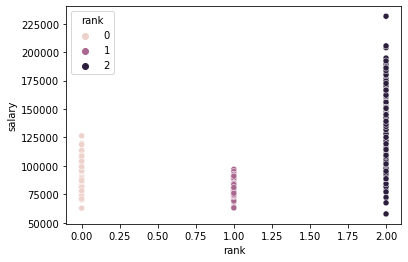

In [13]:
sns.scatterplot(data=df,x="rank",y="salary",hue="rank")

<AxesSubplot:xlabel='discipline', ylabel='salary'>

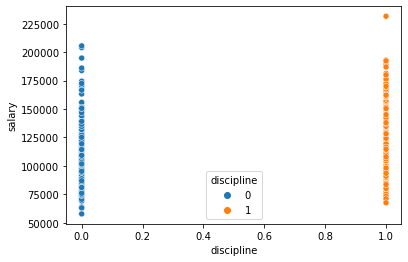

In [14]:
sns.scatterplot(data=df,x="discipline",y="salary",hue="discipline")

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

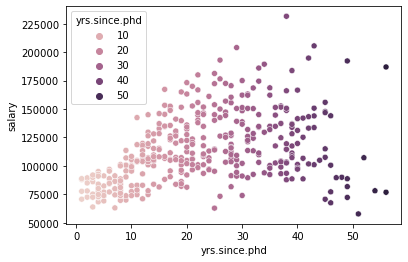

In [15]:
sns.scatterplot(data=df,x="yrs.since.phd",y="salary",hue="yrs.since.phd")

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

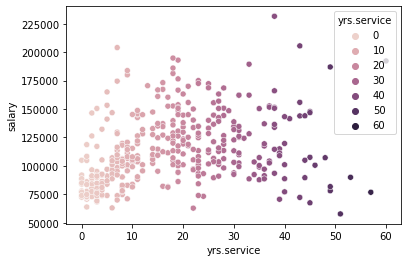

In [16]:
sns.scatterplot(data=df,x="yrs.service",y="salary",hue="yrs.service")

<AxesSubplot:xlabel='sex', ylabel='salary'>

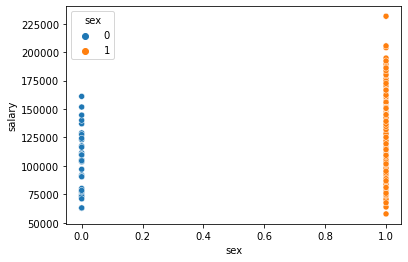

In [17]:
sns.scatterplot(data=df,x="sex",y="salary",hue="sex")

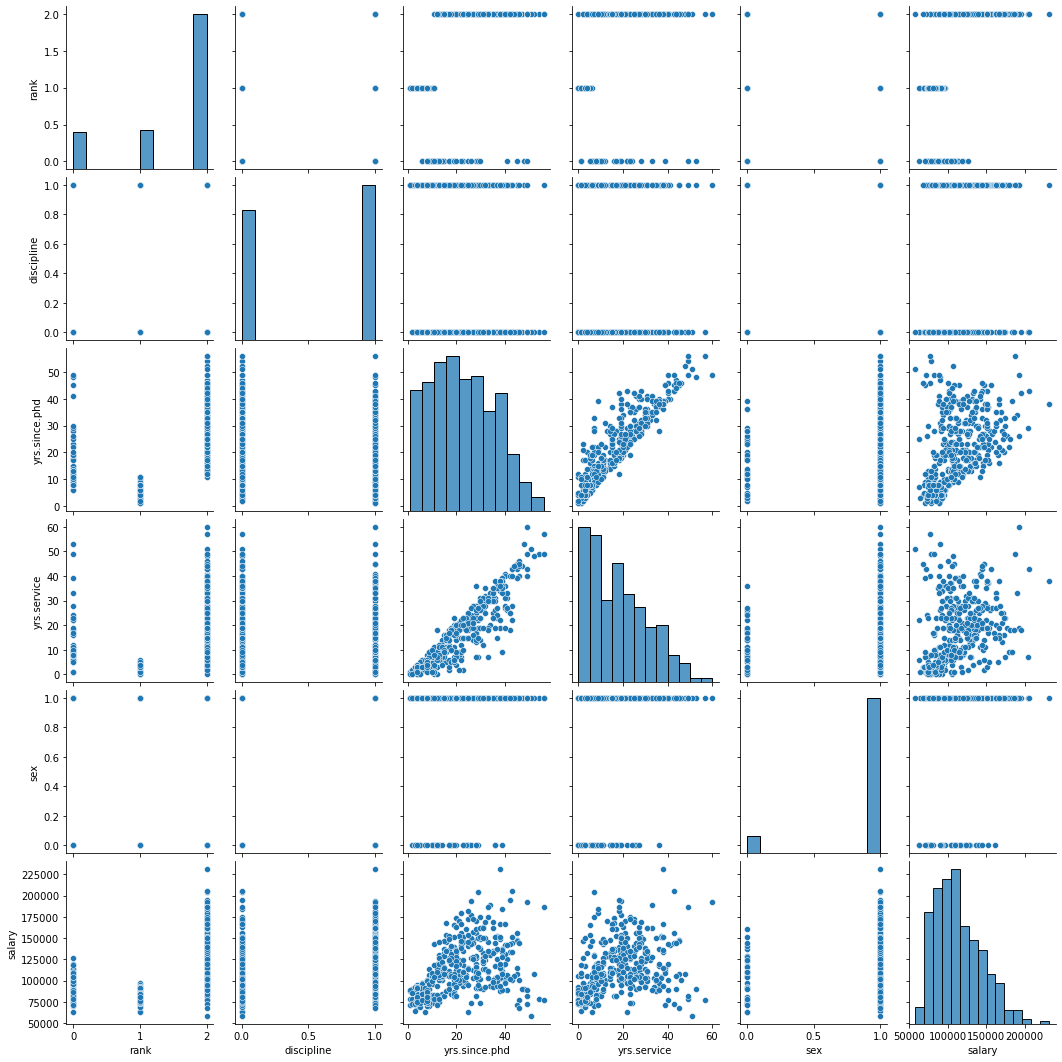

In [18]:
sns.pairplot(df)

Lets check correlation of all variable

In [19]:
df.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

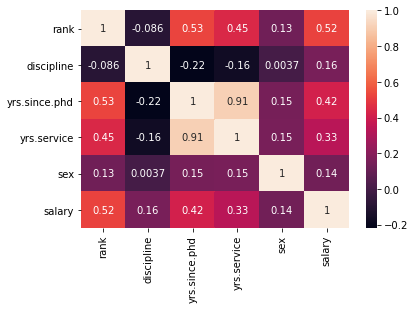

In [20]:

sns.heatmap(df.corr(),annot=True)

# Lets do some statistical analysis

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,397.0,1.508816,0.757486,0.0,1.0,2.0,2.0,2.0
discipline,397.0,0.544081,0.498682,0.0,0.0,1.0,1.0,1.0
yrs.since.phd,397.0,22.314861,12.887003,1.0,12.0,21.0,32.0,56.0
yrs.service,397.0,17.614610,13.006024,0.0,7.0,16.0,27.0,60.0
sex,397.0,0.901763,0.298010,0.0,1.0,1.0,1.0,1.0
salary,397.0,113706.458438,30289.038695,57800.0,91000.0,107300.0,134185.0,231545.0


In [22]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

Skeness is present in data sent +/- 0.5

  rank = -1.5
  yrs.service 0.6
  sex= -2.7
  salary = 0.7  

<AxesSubplot:xlabel='rank', ylabel='Density'>

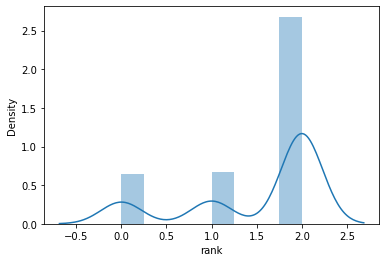

In [23]:
sns.distplot(df["rank"])

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

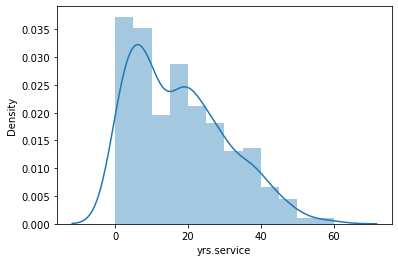

In [24]:
sns.distplot(df["yrs.service"])

<AxesSubplot:xlabel='salary', ylabel='Density'>

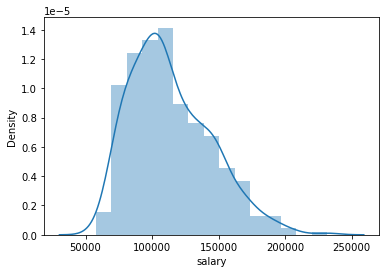

In [25]:
sns.distplot(df["salary"])

<AxesSubplot:xlabel='sex', ylabel='Density'>

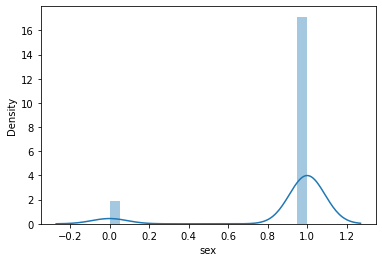

In [26]:
sns.distplot(df["sex"])

<AxesSubplot:>

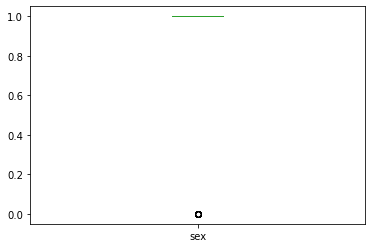

In [27]:
# Cheking outliers

df['sex'].plot.box()


<AxesSubplot:>

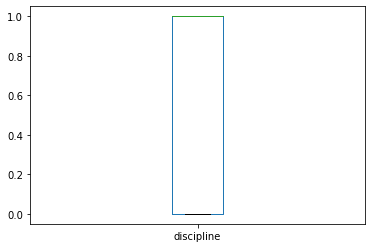

In [28]:
df['discipline'].plot.box()

<AxesSubplot:>

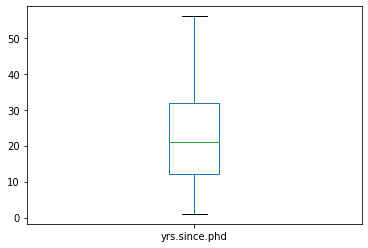

In [29]:
df['yrs.since.phd'].plot.box()

<AxesSubplot:>

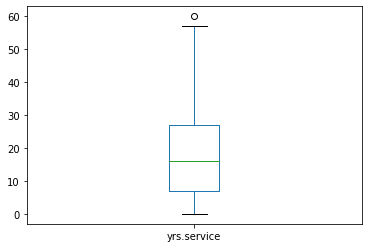

In [30]:
df['yrs.service'].plot.box()

<AxesSubplot:>

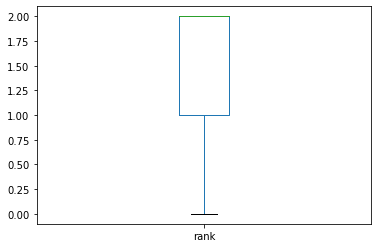

In [31]:
df['rank'].plot.box()

rank                AxesSubplot(0.125,0.536818;0.227941x0.343182)
discipline       AxesSubplot(0.398529,0.536818;0.227941x0.343182)
yrs.since.phd    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
yrs.service            AxesSubplot(0.125,0.125;0.227941x0.343182)
sex                 AxesSubplot(0.398529,0.125;0.227941x0.343182)
salary              AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

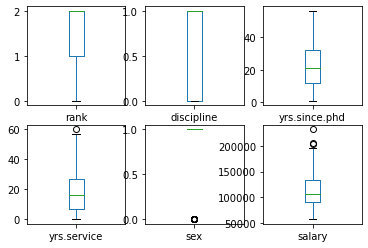

In [32]:
# Lets plot all in one place

df.plot(kind='box',subplots=True,layout=(2,3))

Outliers are present in Salary and yrs.service

In [35]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape


(397, 6)

In [36]:
threshold=3
print(np.where(z>3))

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
       103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
       230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
       341, 358, 361, 364], dtype=int64), array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
      dtype=int64))


In [37]:
len(np.where(z>3)[0])

43

In [38]:
df_new=df[(z<3).all(axis=1)]

print('old df', df.shape)
print('new df', df_new.shape)

old df (397, 6)
new df (354, 6)


# Outliers are removed now let's train Model

In [39]:
# defining independent variable 

x=df_new.iloc[:,:-1]

# and the lable

y=df_new.iloc[:,-1]

In [40]:
x.head(5)

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2,1,19,18,1
1,2,1,20,16,1
2,1,1,4,3,1
3,2,1,45,39,1
4,2,1,40,41,1


In [41]:
y.head(5)

0    139750
1    173200
2     79750
3    115000
4    141500
Name: salary, dtype: int64

In [42]:
x.shape

(354, 5)

In [43]:
y.shape

(354,)

In [44]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [45]:
x

array([[ 0.66261867,  0.9133438 , -0.16993349,  0.21391071,  0.        ],
       [ 0.66261867,  0.9133438 , -0.09133723,  0.06567291,  0.        ],
       [-1.18533666,  0.9133438 , -1.64343352, -1.32485378,  0.        ],
       ...,
       [ 0.66261867, -1.09487797,  1.38580057,  0.67335521,  0.        ],
       [ 0.66261867, -1.09487797,  0.28223854, -0.0121133 ,  0.        ],
       [-1.18533666, -1.09487797, -1.16828402, -1.16384273,  0.        ]])

In [46]:
from sklearn.preprocessing import StandardScaler

stc=StandardScaler()
x=stc.fit_transform(x)

x

array([[ 0.66261867,  0.9133438 , -0.16993349,  0.21391071,  0.        ],
       [ 0.66261867,  0.9133438 , -0.09133723,  0.06567291,  0.        ],
       [-1.18533666,  0.9133438 , -1.64343352, -1.32485378,  0.        ],
       ...,
       [ 0.66261867, -1.09487797,  1.38580057,  0.67335521,  0.        ],
       [ 0.66261867, -1.09487797,  0.28223854, -0.0121133 ,  0.        ],
       [-1.18533666, -1.09487797, -1.16828402, -1.16384273,  0.        ]])

In [47]:
# Importing models and other requirment for training

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=44)

In [50]:
x_train.shape

(247, 5)

In [51]:
y_train.shape

(247,)

In [52]:
x_test.shape

(107, 5)

In [53]:
y_test.shape

(107,)

# Linear Regression Model

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [56]:
lr.intercept_

113869.84772888363

In [57]:
lr.coef_

array([15358.18554959,  7253.58371035,  9112.14847454, -6198.20523427,
           0.        ])

In [58]:
lr.score(x_train,y_train)

0.3620510179962563

In [59]:
pred=lr.predict(x_test)
print("predicted result ",pred)
print('actual result',y_test)

predicted result  [116497.58584799  73896.7145279   78325.44738149 129905.39250017
  85053.30358335 125855.22110576 132603.5170137  115003.64486386
  79330.38382699  85289.57658363 135445.14851437 119458.9923908
  94255.73074525 134604.85653495 127358.00320589 133128.3932365
  94528.76894682  76868.16258252  94356.1750569  138080.45620901
 130871.89950858 134421.2103318   99939.65258519 136467.65069563
  95496.49032038 119265.3595897  134025.79706811 114516.64406975
  91999.65706009 130879.95503266  95526.74845736 129041.97575333
 118595.75019273 120642.82300919 116318.02808057 116056.24018008
  81702.06241746 121783.15986568 102397.72649432  83588.97565157
 124558.70599241 118864.68337889 100007.27168436 131757.62297103
  95405.49705596  92728.01288177  75011.24090477 139125.51066972
 114329.21706988 133244.95644635  94528.76894682 117188.08770004
 138576.91222961 130294.14792087 124081.291153   124761.95496346
 117240.5782035   73688.33258131 113946.53838879  84291.5970731
 118282.64

In [60]:
print('Mean Absolute Error :',mean_absolute_error(y_test,pred))
print('Mean Squared Error :',mean_squared_error(y_test,pred))
print('Root mean Squared Error',np.sqrt(mean_squared_error(y_test,pred)))
print('r2 score :',r2_score(y_test,pred))

Mean Absolute Error : 17165.320776541415
Mean Squared Error : 440103318.63898313
Root mean Squared Error 20978.639580272673
r2 score : 0.45873362855210376


# K- Nieghbour Regression Model

In [61]:
from sklearn.neighbors import KNeighborsRegressor



In [62]:
knr=KNeighborsRegressor(n_neighbors=5)
knr.fit(x_train,y_train)
knr.score(x_train,y_train)

0.6048565846047542

In [63]:
predknr=knr.predict(x_test)
print("predicted result ",predknr)
print('actual result',y_test)

predicted result  [120927.4  81774.4  84976.6 136612.8 103504.  128020.4 135009.2 114055.4
  84813.8  75416.2 126882.6 122786.2  92004.2 128973.6 129017.8 133020.2
  92555.8  84814.  104122.2 112241.2 125288.8 116453.   83532.6 106769.8
 103179.  102844.8 160239.6 111066.8 104477.  146470.8  90080.  132205.4
 122739.  124260.  135532.  141853.   84777.8 115862.   83841.8  79660.
 137848.  117305.2  83841.8 140423.   90104.2 104122.2  80031.8 106609.
 111066.8 128973.6  92555.8 124063.  113626.2 116994.6 132930.4 158204.4
  99251.8  81774.4 119821.6  75416.2 115299.2  71180.  128020.4  83532.6
 136586.4 101080.8  97743.  111739.2 103900.6 109824.8  73499.2 132885.
 119173.  123512.4 124063.  118588.4 102466.4 118852.2 135532.  131134.2
  82582.  103179.  101080.8 109824.8  98138.   82139.8 140988.4  90080.
 120927.4 124782.  113724.4 129913.  148811.6  80031.8 135009.2  70220.
 116453.   90080.  103179.  129913.  141482.2  88528.   75416.2 106609.
 121197.  110580.4 100533.6]
actual res

In [64]:
print('Mean Absolute Error :',mean_absolute_error(y_test,predknr))
print('Mean Squared Error :',mean_squared_error(y_test,predknr))
print('Root mean Squared Error',np.sqrt(mean_squared_error(y_test,predknr)))
print('r2 score :',r2_score(y_test,predknr))

Mean Absolute Error : 15479.461682242989
Mean Squared Error : 451551188.7207477
Root mean Squared Error 21249.73385058617
r2 score : 0.44465432753904666


# Support Vector Regression Model

In [65]:
from sklearn.svm import SVR

In [66]:
sv=SVR(kernel='rbf')
sv.fit(x_train,y_train)
sv.score(x_train,y_train)

-0.053539981295489536

In [67]:
# KERNAL = poly

svp=SVR(kernel='poly')
svp.fit(x_train,y_train)
svp.score(x_train,y_train)

-0.052114536558865776

We can see above score is showing negative for SVR so better to not choose this for predict

# Decission Tree Model

In [68]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)

0.9483513193736592

In [70]:
prede=dt.predict(x_test)
print("predicted result ",prede)
print('actual result',y_test)

predicted result  [102914.          73877.         100102.         126621.
  86250.         106231.         129771.5         97262.
  81285.          75996.         132261.         151292.
  89942.         111168.         151575.         141500.
  92233.33333333  81285.         105000.         133700.
 111168.         146856.          84000.         106689.
  86250.          87800.         165233.33333333 108262.
 126431.         145028.          93039.5        144640.
 133900.         134885.         115800.         155500.
 108413.         144050.          77000.          70700.
 194800.         134800.          85550.         113398.
  88400.         105000.          82099.         106689.
 114330.         111168.          92233.33333333 168500.
 106689.         111168.         174500.         150564.
  99000.          86895.         122400.          74500.
 103106.          72750.         106231.          88397.5
 175000.         100533.5         86250.         127100.
 102600.    

In [74]:
model=[lr,knr,sv,dt]
a=np.array(y_test)
a

for i in model:
    i.fit(x_train,y_train)
    i.score(x_train,y_train)
    predi=i.predict(x_test)
    print('performance matrix of',i,'is:')
    print('Mean Absolute Error :',mean_absolute_error(y_test,predi))
    print('Mean Squared Error :',mean_squared_error(y_test,predi))
    print('Root mean Squared Error',np.sqrt(mean_squared_error(y_test,predi)))
    print('r2 score :',r2_score(y_test,predi))
    df_com=pd.DataFrame({"Original":a,"Predicted":predi},index=range(len(a)))
    print(df_com)



performance matrix of LinearRegression() is:
Mean Absolute Error : 17165.320776541415
Mean Squared Error : 440103318.63898313
Root mean Squared Error 20978.639580272673
r2 score : 0.45873362855210376
     Original      Predicted
0      122875  116497.585848
1       70000   73896.714528
2       81500   78325.447381
3      119015  129905.392500
4      113341   85053.303583
..        ...            ...
102     81035   84291.597073
103    142023  137849.324036
104    109305  121299.094664
105    148800  115276.935534
106    119800   90441.405431

[107 rows x 2 columns]
performance matrix of KNeighborsRegressor() is:
Mean Absolute Error : 15479.461682242989
Mean Squared Error : 451551188.7207477
Root mean Squared Error 21249.73385058617
r2 score : 0.44465432753904666
     Original  Predicted
0      122875   120927.4
1       70000    81774.4
2       81500    84976.6
3      119015   136612.8
4      113341   103504.0
..        ...        ...
102     81035    75416.2
103    142023   106609.0
10

In [80]:
from sklearn.model_selection import cross_val_score
j=[lr,knr,sv,dt]
for n in j:
    print('Cross_Validation_score of',n,'is')
    score=cross_val_score(n,x,y,cv=4)
    print(score)
    print(score.mean())
    print(score.std())
    print('\n')

Cross_Validation_score of LinearRegression() is
[0.26047464 0.47538269 0.29479588 0.32839486]
0.33976201909316095
0.08190027764330801


Cross_Validation_score of KNeighborsRegressor() is
[0.12845642 0.55838245 0.42893273 0.35976795]
0.368884887572971
0.15604809822999294


Cross_Validation_score of SVR() is
[-0.00398592 -0.04550483 -0.03332534 -0.16950343]
-0.06307987928383846
0.06326982680554674


Cross_Validation_score of DecisionTreeRegressor() is
[-0.15536312  0.04423328  0.27360573 -0.27074477]
-0.02706722093891581
0.20695807164891994




In [81]:
import joblib
joblib.dump(knr,'knr_Final_World_Happiness_Report.obj')

['knr_Final_World_Happiness_Report.obj']

In [82]:
# Model which looks performing good in saved # Accuracy is little low because of data is small to train.